In [2]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # better plots


In [4]:
# Load the dataset
df = pd.read_csv("music_dataset_mod.csv")

# Make a copy for analysis
data = df.copy()

# Quick look
print("Shape of dataset:", data.shape)
data.head()


Shape of dataset: (1000, 13)


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [6]:
# Null values check
print("Missing values per column:\n", data.isnull().sum())

# Total missing values
print("\nTotal missing values:", data.isnull().sum().sum())


Missing values per column:
 Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64

Total missing values: 110


In [10]:
# How many tracks have missing Genre?
missing_genres = data['Genre'].isnull().sum()
print(f"Number of tracks without genre: {missing_genres}")

# Unique genres
unique_genres = data['Genre'].nunique()
print(f"Number of unique genres: {unique_genres}")

# Genre distribution
print("\nGenre counts:\n", data['Genre'].value_counts())


Number of tracks without genre: 110
Number of unique genres: 5

Genre counts:
 Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64


C:\Users\SHRUTI\AppData\Local\temp\ipykernel_19936\1448909725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index, palette="viridis")


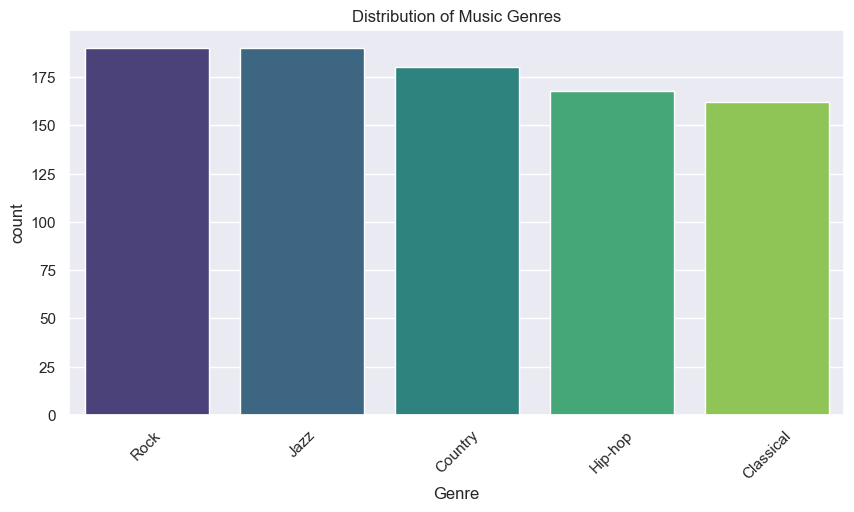

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Genre', order=data['Genre'].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Distribution of Music Genres")
plt.show()


In [16]:
# Drop rows with missing genre
corr_data = data.dropna(subset=['Genre']).copy()

# Encode genre (LabelEncoder turns categories into numbers)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
corr_data['Genre_encoded'] = le.fit_transform(corr_data['Genre'])

corr_data.head()


,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre,Genre_encoded
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country,1


In [20]:
# Drop original categorical 'genre' column (we'll use encoded one)
corr_ready = corr_data.drop(columns=['Genre'])


In [22]:
# Compute correlation matrix
corr_matrix = corr_ready.corr()

# Check correlation with genre
print(corr_matrix['Genre_encoded'].sort_values(ascending=False))


Genre_encoded                  1.000000
Distorted Guitar               0.607291
Metal Frequencies              0.582498
Electronic Element Presence    0.232907
Drums Influence                0.169501
Percussion Strength            0.146171
Tempo                          0.113906
Rhythm Complexity              0.095718
Ambient Sound Influence        0.014561
Vocal Presence                -0.005501
Instrumental Overlaps         -0.071734
String Instrument Detection   -0.185088
Dynamics Range                -0.462600
Name: Genre_encoded, dtype: float64


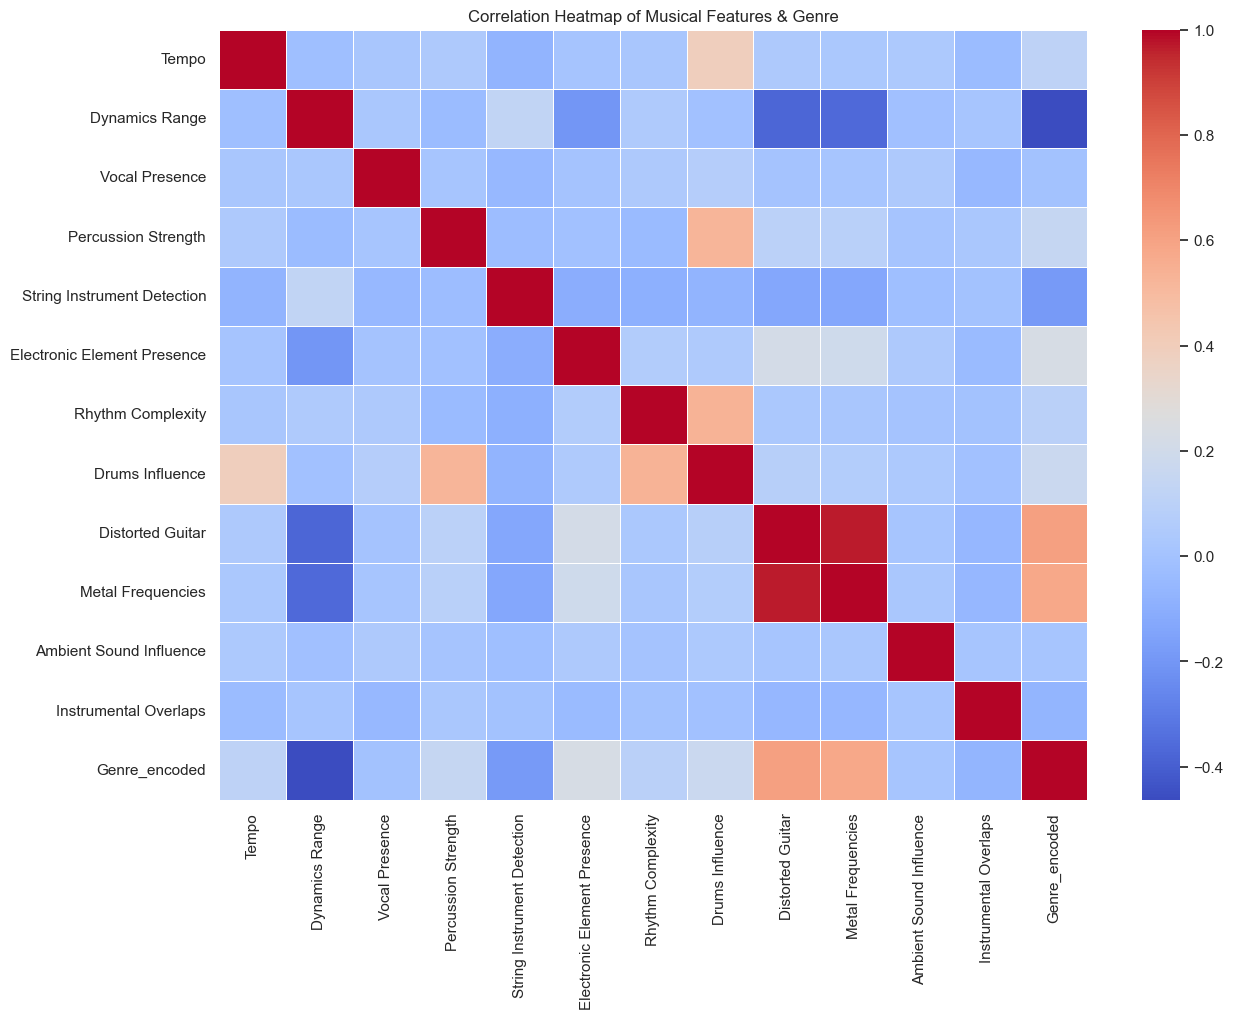

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Musical Features & Genre")
plt.show()


C:\Users\SHRUTI\AppData\Local\temp\ipykernel_19936\3907427397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_matrix['Genre_encoded'].index,


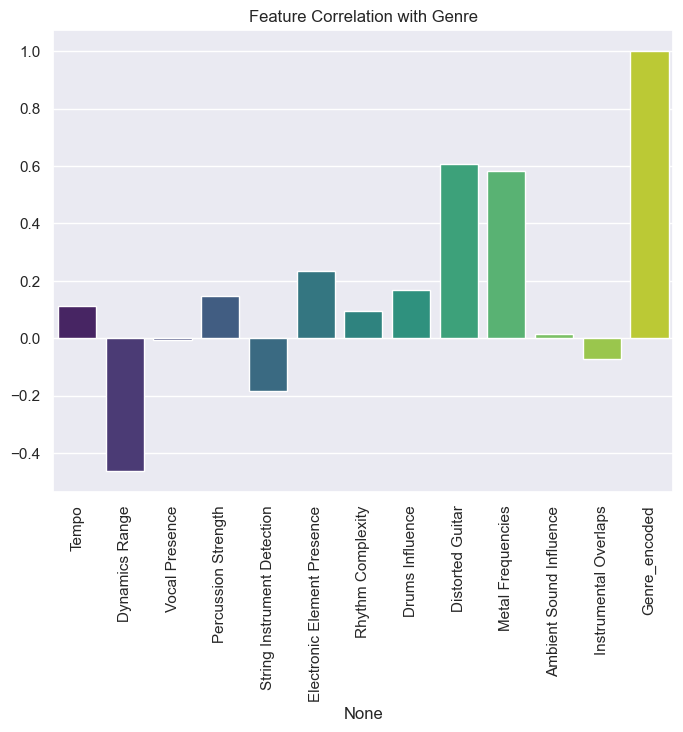

In [28]:
# If you only want to visualize how features relate to genre:

plt.figure(figsize=(8,6))
sns.barplot(x=corr_matrix['Genre_encoded'].index, 
            y=corr_matrix['Genre_encoded'].values, 
            palette="viridis")
plt.xticks(rotation=90)
plt.title("Feature Correlation with Genre")
plt.show()


In [32]:
#1. Prepare Data for PCA
#Drop missing genres.
#Separate features (X) and labels (y).
#Scale the features (PCA requires standardized data).

from sklearn.preprocessing import StandardScaler

# Use the cleaned data from previous step (with genre encoded)
pca_data = corr_data.copy()

# Features (drop original 'genre' and keep numeric only)
X = pca_data.drop(columns=['Genre', 'Genre_encoded'])
y = pca_data['Genre_encoded']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Original feature shape:", X_scaled.shape)


Original feature shape: (890, 12)


In [34]:
from sklearn.decomposition import PCA

# Initialize PCA (keep all components for now)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Display first 10 components variance
for i, var in enumerate(cumulative_variance[:10], 1):
    print(f"PC{i}: {var:.2f}")


PC1: 0.20
PC2: 0.35
PC3: 0.44
PC4: 0.53
PC5: 0.62
PC6: 0.70
PC7: 0.78
PC8: 0.85
PC9: 0.92
PC10: 0.98


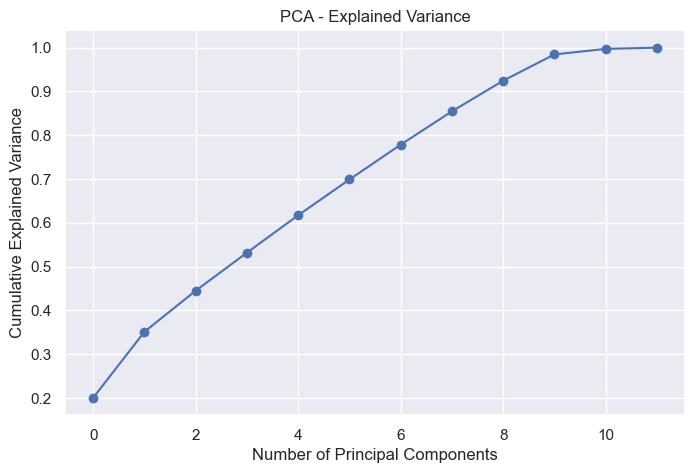

In [36]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.grid(True)
plt.show()


In [38]:
# Find number of components where variance >= 80%
optimal_components = np.argmax(cumulative_variance >= 0.80) + 1
print(f"Optimal number of components to capture ≥80% variance: {optimal_components}")


Optimal number of components to capture ≥80% variance: 8


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split (30% test set)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [42]:
# Logistic Regression model
log_reg_original = LogisticRegression(max_iter=10000)
log_reg_original.fit(X_train, y_train)

# Predictions
y_pred_original = log_reg_original.predict(X_test)

# Evaluation
print("🔹 Logistic Regression on Original Data")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("\nClassification Report:\n", classification_report(y_test, y_pred_original))


🔹 Logistic Regression on Original Data
Accuracy: 0.5842696629213483

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        49
           1       0.49      0.31      0.38        54
           2       0.47      0.48      0.48        50
           3       0.46      0.44      0.45        57
           4       0.58      0.72      0.64        57

    accuracy                           0.58       267
   macro avg       0.57      0.59      0.58       267
weighted avg       0.57      0.58      0.57       267



In [44]:
# Apply PCA with optimal components
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

# Train-test split again (this time with PCA data)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)


In [46]:
log_reg_pca = LogisticRegression(max_iter=10000)
log_reg_pca.fit(X_train_pca, y_train_pca)

# Predictions
y_pred_pca = log_reg_pca.predict(X_test_pca)

# Evaluation
print("🔹 Logistic Regression on PCA Data")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test_pca, y_pred_pca))


🔹 Logistic Regression on PCA Data
Accuracy: 0.5430711610486891

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90        49
           1       0.42      0.30      0.35        54
           2       0.43      0.44      0.44        50
           3       0.40      0.37      0.39        57
           4       0.55      0.70      0.62        57

    accuracy                           0.54       267
   macro avg       0.53      0.55      0.54       267
weighted avg       0.53      0.54      0.53       267



In [50]:
# Copy original dataset
final_data = data.copy()

# Labeled data (with known genre)
labeled = final_data.dropna(subset=['Genre'])

# Unlabeled data (missing genre)
unlabeled = final_data[final_data['Genre'].isnull()]

print("Tracks with known genres:", labeled.shape[0])
print("Tracks with missing genres:", unlabeled.shape[0])


Tracks with known genres: 890
Tracks with missing genres: 110


In [52]:
# Features from labeled data
X_full = labeled.drop(columns=['Genre'])
y_full = le.fit_transform(labeled['Genre'])  # reuse LabelEncoder from earlier

# Standardize
X_full_scaled = scaler.fit_transform(X_full)

# Unlabeled features
X_unlabeled = unlabeled.drop(columns=['Genre'])
X_unlabeled_scaled = scaler.transform(X_unlabeled)


In [54]:
# --- If PCA Model was better ---
pca = PCA(n_components=optimal_components)
X_full_pca = pca.fit_transform(X_full_scaled)
X_unlabeled_pca = pca.transform(X_unlabeled_scaled)

# Retrain Logistic Regression on full labeled data
best_model = LogisticRegression(max_iter=10000)
best_model.fit(X_full_pca, y_full)

# Predict missing genres
unlabeled_preds = best_model.predict(X_unlabeled_pca)


In [56]:
# Convert encoded predictions back to genre names
unlabeled['Predicted_Genre'] = le.inverse_transform(unlabeled_preds)

# Fill missing genres in original dataframe
final_data.loc[final_data['Genre'].isnull(), 'Genre'] = unlabeled['Predicted_Genre']

print("✅ All missing genres have been predicted and filled!")


✅ All missing genres have been predicted and filled!


C:\Users\SHRUTI\AppData\Local\temp\ipykernel_19936\3492986491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled['Predicted_Genre'] = le.inverse_transform(unlabeled_preds)


In [58]:
final_data.to_csv("music_dataset_completed.csv", index=False)
print("Completed dataset saved as music_dataset_completed.csv")


Completed dataset saved as music_dataset_completed.csv
